# Project Brief


### Automobile company want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.max_columns = 100
pd.options.display.max_rows = 150

import warnings
warnings.filterwarnings('ignore')

## Importing 'CarPrice_Assignment.csv' dataset

In [2]:
# importing 'CarPrice_Assignment.csv' dataset
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

# Data understanding, preparation and EDA

#### checking for missing values

In [3]:
# checking info of data set
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## Getting Company name from Car name column

In [4]:
# getting car company name
car["CarName"]= car["CarName"].str.split(" ", n = 1, expand = True) 
car.head()

car_ID  symboling      CarName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

In [5]:
# dropping "car_ID" column as it is  usless for making model
car.drop(["car_ID"], axis = 1, inplace = True) 

## Renaming column names properly

#### here we find that there are no missing values but there are some spelling mistakes and data are not in correct format for further analysis

In [6]:
# checking names of columns
car.columns.values

array(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'], dtype=object)

In [7]:
#Renaming the CarName column to CompanyName 
car1 = car
car1.columns = ['symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price']

In [8]:
car1.head()

symboling  CompanyName fueltype aspiration doornumber      carbody  \
0          3  alfa-romero      gas        std        two  convertible   
1          3  alfa-romero      gas        std        two  convertible   
2          1  alfa-romero      gas        std        two    hatchback   
3          2         audi      gas        std       four        sedan   
4          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

## Renaming company name properly

In [9]:
# checking company name
set(list(car1["CompanyName"]))

{'Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'maxda',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porcshce',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'vokswagen',
 'volkswagen',
 'volvo',
 'vw'}

#### many company names are incorectly written ,here we are correcting the company names for further analysis

In [10]:
# Correcting spelling mistake
# renaming porcshce to porsche
car1 = car1.replace('porcshce', 'porsche')
# renaming vokswagen to volkswagen 
car1 = car1.replace('vokswagen', 'volkswagen')
# renaming maxda to mazda
car1 = car1.replace('maxda', 'mazda')
# renaming vw to volkswagen
car1 = car1.replace('vw', 'volkswagen')
# renaming toyouta to toyota
car1 = car1.replace('toyouta', 'toyota')

In [11]:
# cheking company name after correction
set(list(car1["CompanyName"]))

{'Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo'}

## Creating dummy variables 

In [12]:
# creating dummyvariables for the features with many unique values

# creating dummy variables and dropping first column
# creating dummy variables for enginetype
engineType = pd.get_dummies(car1['enginetype'], drop_first = True)
# creating dummy variables for drivewheel
driveWheel = pd.get_dummies(car1['drivewheel'], drop_first = True)
# creating dummy variables for symboling
symBoling = pd.get_dummies(car1['symboling'], drop_first = True)
# creating dummy variables for companyname
companyName = pd.get_dummies(car1['CompanyName'], drop_first = True)
# creating dummy variables for carbody
carBody = pd.get_dummies(car1['carbody'], drop_first = True)
# creating dummy variables for fuelsystem
fuelSystem = pd.get_dummies(car1['fuelsystem'], drop_first = True)
# creating dummy variables for cylindername
cylinderNumber = pd.get_dummies(car1['cylindernumber'], drop_first = True)

In [13]:
# concatenating columns to the rest of the dataset for further evaluation

# concatenating cylindernumber column
car1 = pd.concat([car1, cylinderNumber], axis = 1)
# concatenating enginetype column
car1 = pd.concat([car1, engineType], axis = 1)
# concatenating drivewheel column
car1 = pd.concat([car1, driveWheel], axis = 1)
# concatenating companyname column
car1 = pd.concat([car1, companyName], axis = 1)
# concatenating carbody column
car1 = pd.concat([car1, carBody], axis = 1)
# concatenating fuelsystem column
car1 = pd.concat([car1, fuelSystem], axis = 1)
# concatenating symboling column
car1 = pd.concat([car1, symBoling], axis = 1)

## Dropping columns for which we have created dummy variables

In [14]:
# Drop the columns for which we have created the dummie variables as they will be highly corelated

#dropping cylindernumber column for which we have created dummy
car1.drop(['cylindernumber'], axis = 1, inplace = True)
#dropping drivewheel column for which we have created dummy
car1.drop(['drivewheel'], axis = 1, inplace = True)
#dropping symboling column for which we have created dummy
car1.drop(['symboling'], axis = 1, inplace = True)
#dropping carbody column for which we have created dummy
car1.drop(['carbody'], axis = 1, inplace = True)
#dropping fuelsystem column for which we have created dummy
car1.drop(['fuelsystem'], axis = 1, inplace = True)
#dropping enginetype column for which we have created dummy
car1.drop(['enginetype'], axis = 1, inplace = True)
#dropping companyname column for which we have created dummy
car1.drop(['CompanyName'], axis = 1, inplace = True)

In [15]:
# checking car1 dataframe
car1

fueltype aspiration doornumber enginelocation  wheelbase  carlength  \
0        gas        std        two          front       88.6      168.8   
1        gas        std        two          front       88.6      168.8   
2        gas        std        two          front       94.5      171.2   
3        gas        std       four          front       99.8      176.6   
4        gas        std       four          front       99.4      176.6   
5        gas        std        two          front       99.8      177.3   
6        gas        std       four          front      105.8      192.7   
7        gas        std       four          front      105.8      192.7   
8        gas      turbo       four          front      105.8      192.7   
9        gas      turbo        two          front       99.5      178.2   
10       gas        std        two          front      101.2      176.8   
11       gas        std       four          front      101.2      176.8   
12       gas        std        two          front      101.2      176.8   
13       gas        std       four          front      101.2      176.8   
14       gas        std       four          front      103.5      189.0   
15       gas        std       four          front      103.5      189.0   
16       gas        std        two          front      103.5      193.8   
17       gas        std       four          front      110.0      197.0   
18       gas        std        two          front       88.4      141.1   
19       gas        std        two          front       94.5      155.9   
20       gas        std       four          front       94.5      158.8   
21       gas        std        two          front       93.7      157.3   
22       gas        std        two          front       93.7      157.3   
23       gas      turbo        two          front       93.7      157.3   
24       gas        std       four          front       93.7      157.3   
25       gas        std       four          front       93.7      157.3   
26       gas        std       four          front       93.7      157.3   
27       gas      turbo        two          front       93.7      157.3   
28       gas        std       four          front      103.3      174.6   
29       gas      turbo        two          front       95.9      173.2   
30       gas        std        two          front       86.6      144.6   
31       gas        std        two          front       86.6      144.6   
32       gas        std        two          front       93.7      150.0   
33       gas        std        two          front       93.7      150.0   
34       gas        std        two          front       93.7      150.0   
35       gas        std       four          front       96.5      163.4   
36       gas        std       four          front       96.5      157.1   
37       gas        std        two          front       96.5      167.5   
38       gas        std        two          front       96.5      167.5   
39       gas        std       four          front       96.5      175.4   
40       gas        std       four          front       96.5      175.4   
41       gas        std       four          front       96.5      175.4   
42       gas        std        two          front       96.5      169.1   
43       gas        std       four          front       94.3      170.7   
44       gas        std        two          front       94.5      155.9   
45       gas        std       four          front       94.5      155.9   
46       gas        std        two          front       96.0      172.6   
47       gas        std       four          front      113.0      199.6   
48       gas        std       four          front      113.0      199.6   
49       gas        std        two          front      102.0      191.7   
50       gas        std        two          front       93.1      159.1   
51       gas        std        two          front       93.1      159.1   
52       gas        std      

## Using label encoder for encoding the values of column

In [16]:
# checking data type before
car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 70 columns):
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
five                205 non-null uint8
four                205 non-null uint8
six                 205 non-null uint8
three               205 non-null uint8
twelve           

In [17]:
# using label encoder
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

# labelencoding aspiration column
car1['aspiration'] = le.fit_transform(car1['aspiration'])
# labelencoding doornumber column
car1['doornumber'] = le.fit_transform(car1['doornumber'])
# labelencoding fueltype column
car1['fueltype'] = le.fit_transform(car1['fueltype'])
# labelencoding enginelocation column
car1['enginelocation'] = le.fit_transform(car1['enginelocation'])

In [18]:
# checking company name after use of label encoder
companyName.head()

alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  \
0            1     0    0      0          0      0      0      0       0   
1            1     0    0      0          0      0      0      0       0   
2            1     0    0      0          0      0      0      0       0   
3            0     1    0      0          0      0      0      0       0   
4            0     1    0      0          0      0      0      0       0   

   mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  \
0      0        0           0       0        0         0        0        0   
1      0        0           0       0        0         0        0        0   
2      0        0           0       0        0         0        0        0   
3      0        0           0       0        0         0        0        0   
4      0        0           0       0        0         0        0        0   

   saab  subaru  toyota  volkswagen  volvo  
0     0       0       0           0      0  
1     0       0       0           0      0  
2     0       0       0           0      0  
3     0       0       0           0      0  
4     0       0       0           0      0

In [19]:
# checking datatype after label encoder
car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 70 columns):
fueltype            205 non-null int32
aspiration          205 non-null int32
doornumber          205 non-null int32
enginelocation      205 non-null int32
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
five                205 non-null uint8
four                205 non-null uint8
six                 205 non-null uint8
three               205 non-null uint8
twelve              2

## Plotting pairplot to observe linear relation ship between variables

#### here we are plotting pairwise plot in order to observe some linear relationship between variables which will help us further in  making linear regression model

<Figure size 2160x2160 with 0 Axes>

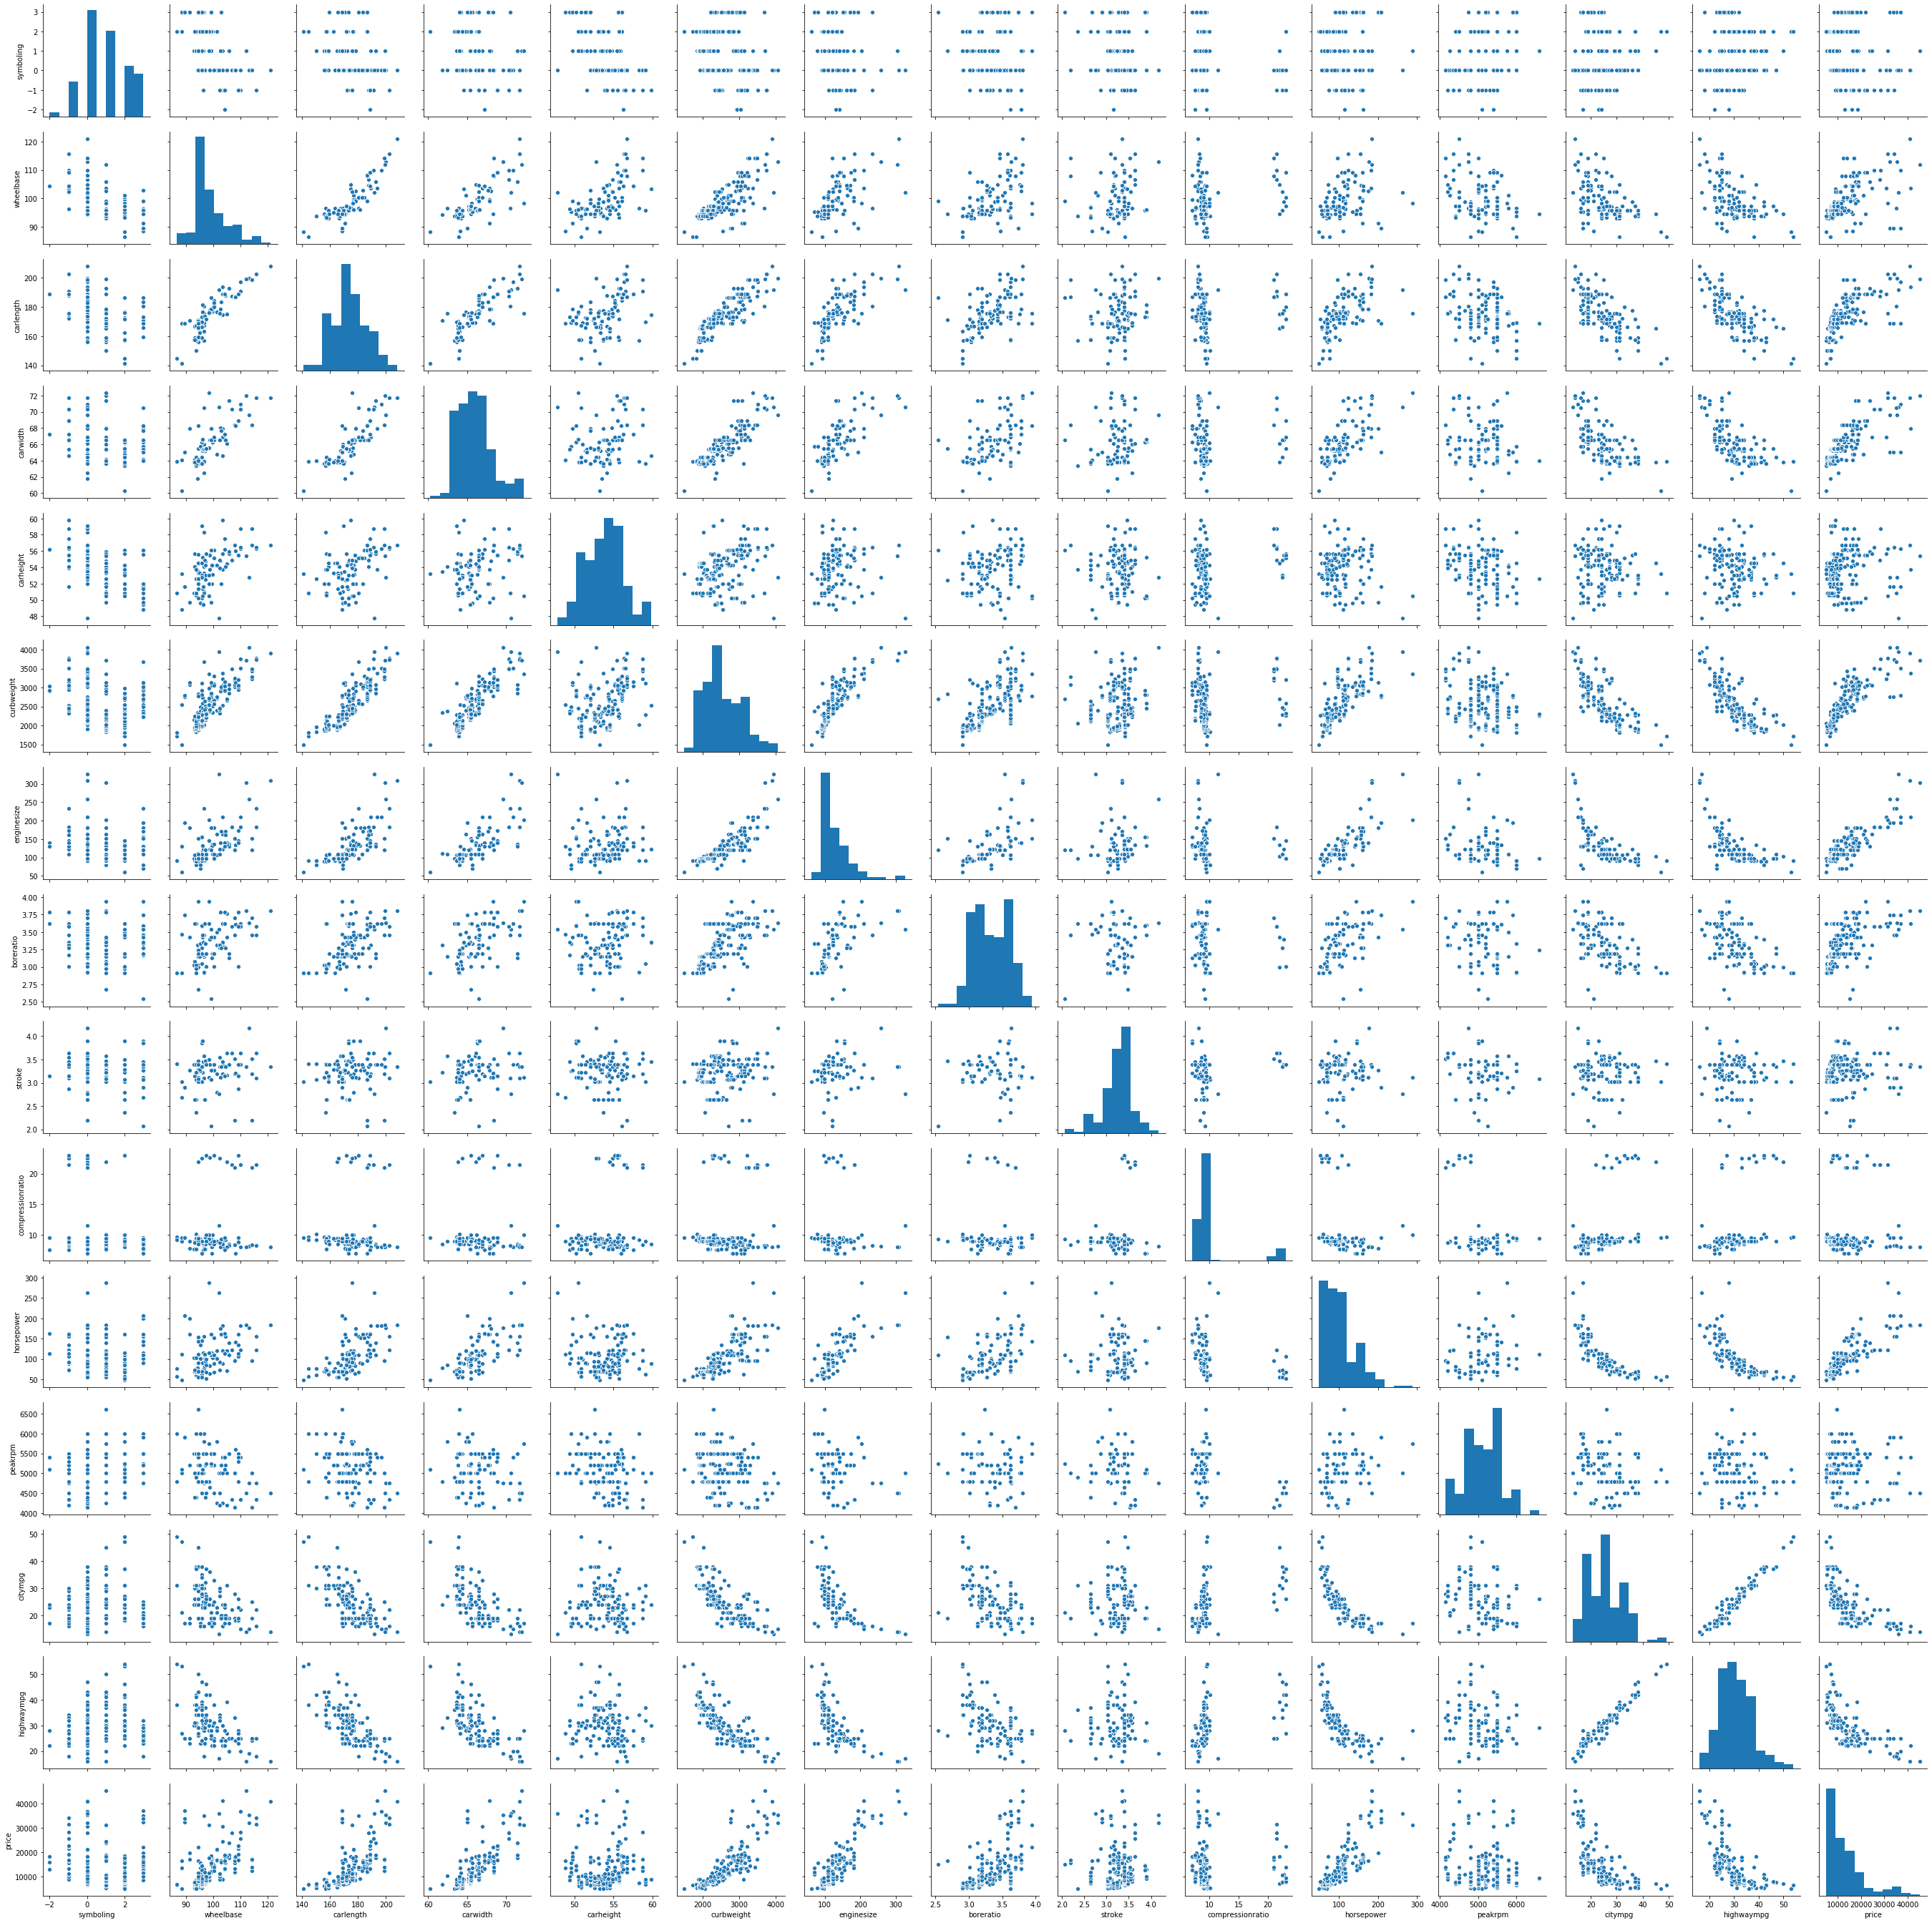

In [20]:
# plotting pair plot to observe relationship between variables
plt.figure(figsize=(30, 30))
sns.pairplot(car)
plt.show()

#### carlength and wheel base are having some linear relationship
#### highwaympg and citympg are having some linear relationship
#### curbweight and carwidth are having some linear relationship

In [21]:
#  Finding freqency of occuring of variables
car1.sum(axis = 0)

fueltype                185.000
aspiration               37.000
doornumber               90.000
enginelocation            3.000
wheelbase             20245.100
carlength             35680.100
carwidth              13511.100
carheight             11013.600
curbweight           523891.000
enginesize            26016.000
boreratio               682.600
stroke                  667.360
compressionratio       2079.220
horsepower            21344.000
peakrpm             1050650.000
citympg                5170.000
highwaympg             6304.000
price               2721725.667
five                     11.000
four                    159.000
six                      24.000
three                     1.000
twelve                    1.000
two                       4.000
dohcv                     1.000
l                        12.000
ohc                     148.000
ohcf                     15.000
ohcv                     13.000
rotor                     4.000
fwd                     120.000
rwd     

In [22]:
# removing least occuring variables
col_to_drop = ['mercury','jaguar','dohcv','spfi','chevrolet','renault','isuzu','mfi','three','twelve','three','rotor','4bbl','alfa-romero','two','rotor']
car1.drop(col_to_drop, axis = 1, inplace = True)

## Visualising highly correlated variables using correlation heatmap

#### here we are plotting correlation heatmap and enlisting the highly correlated variables

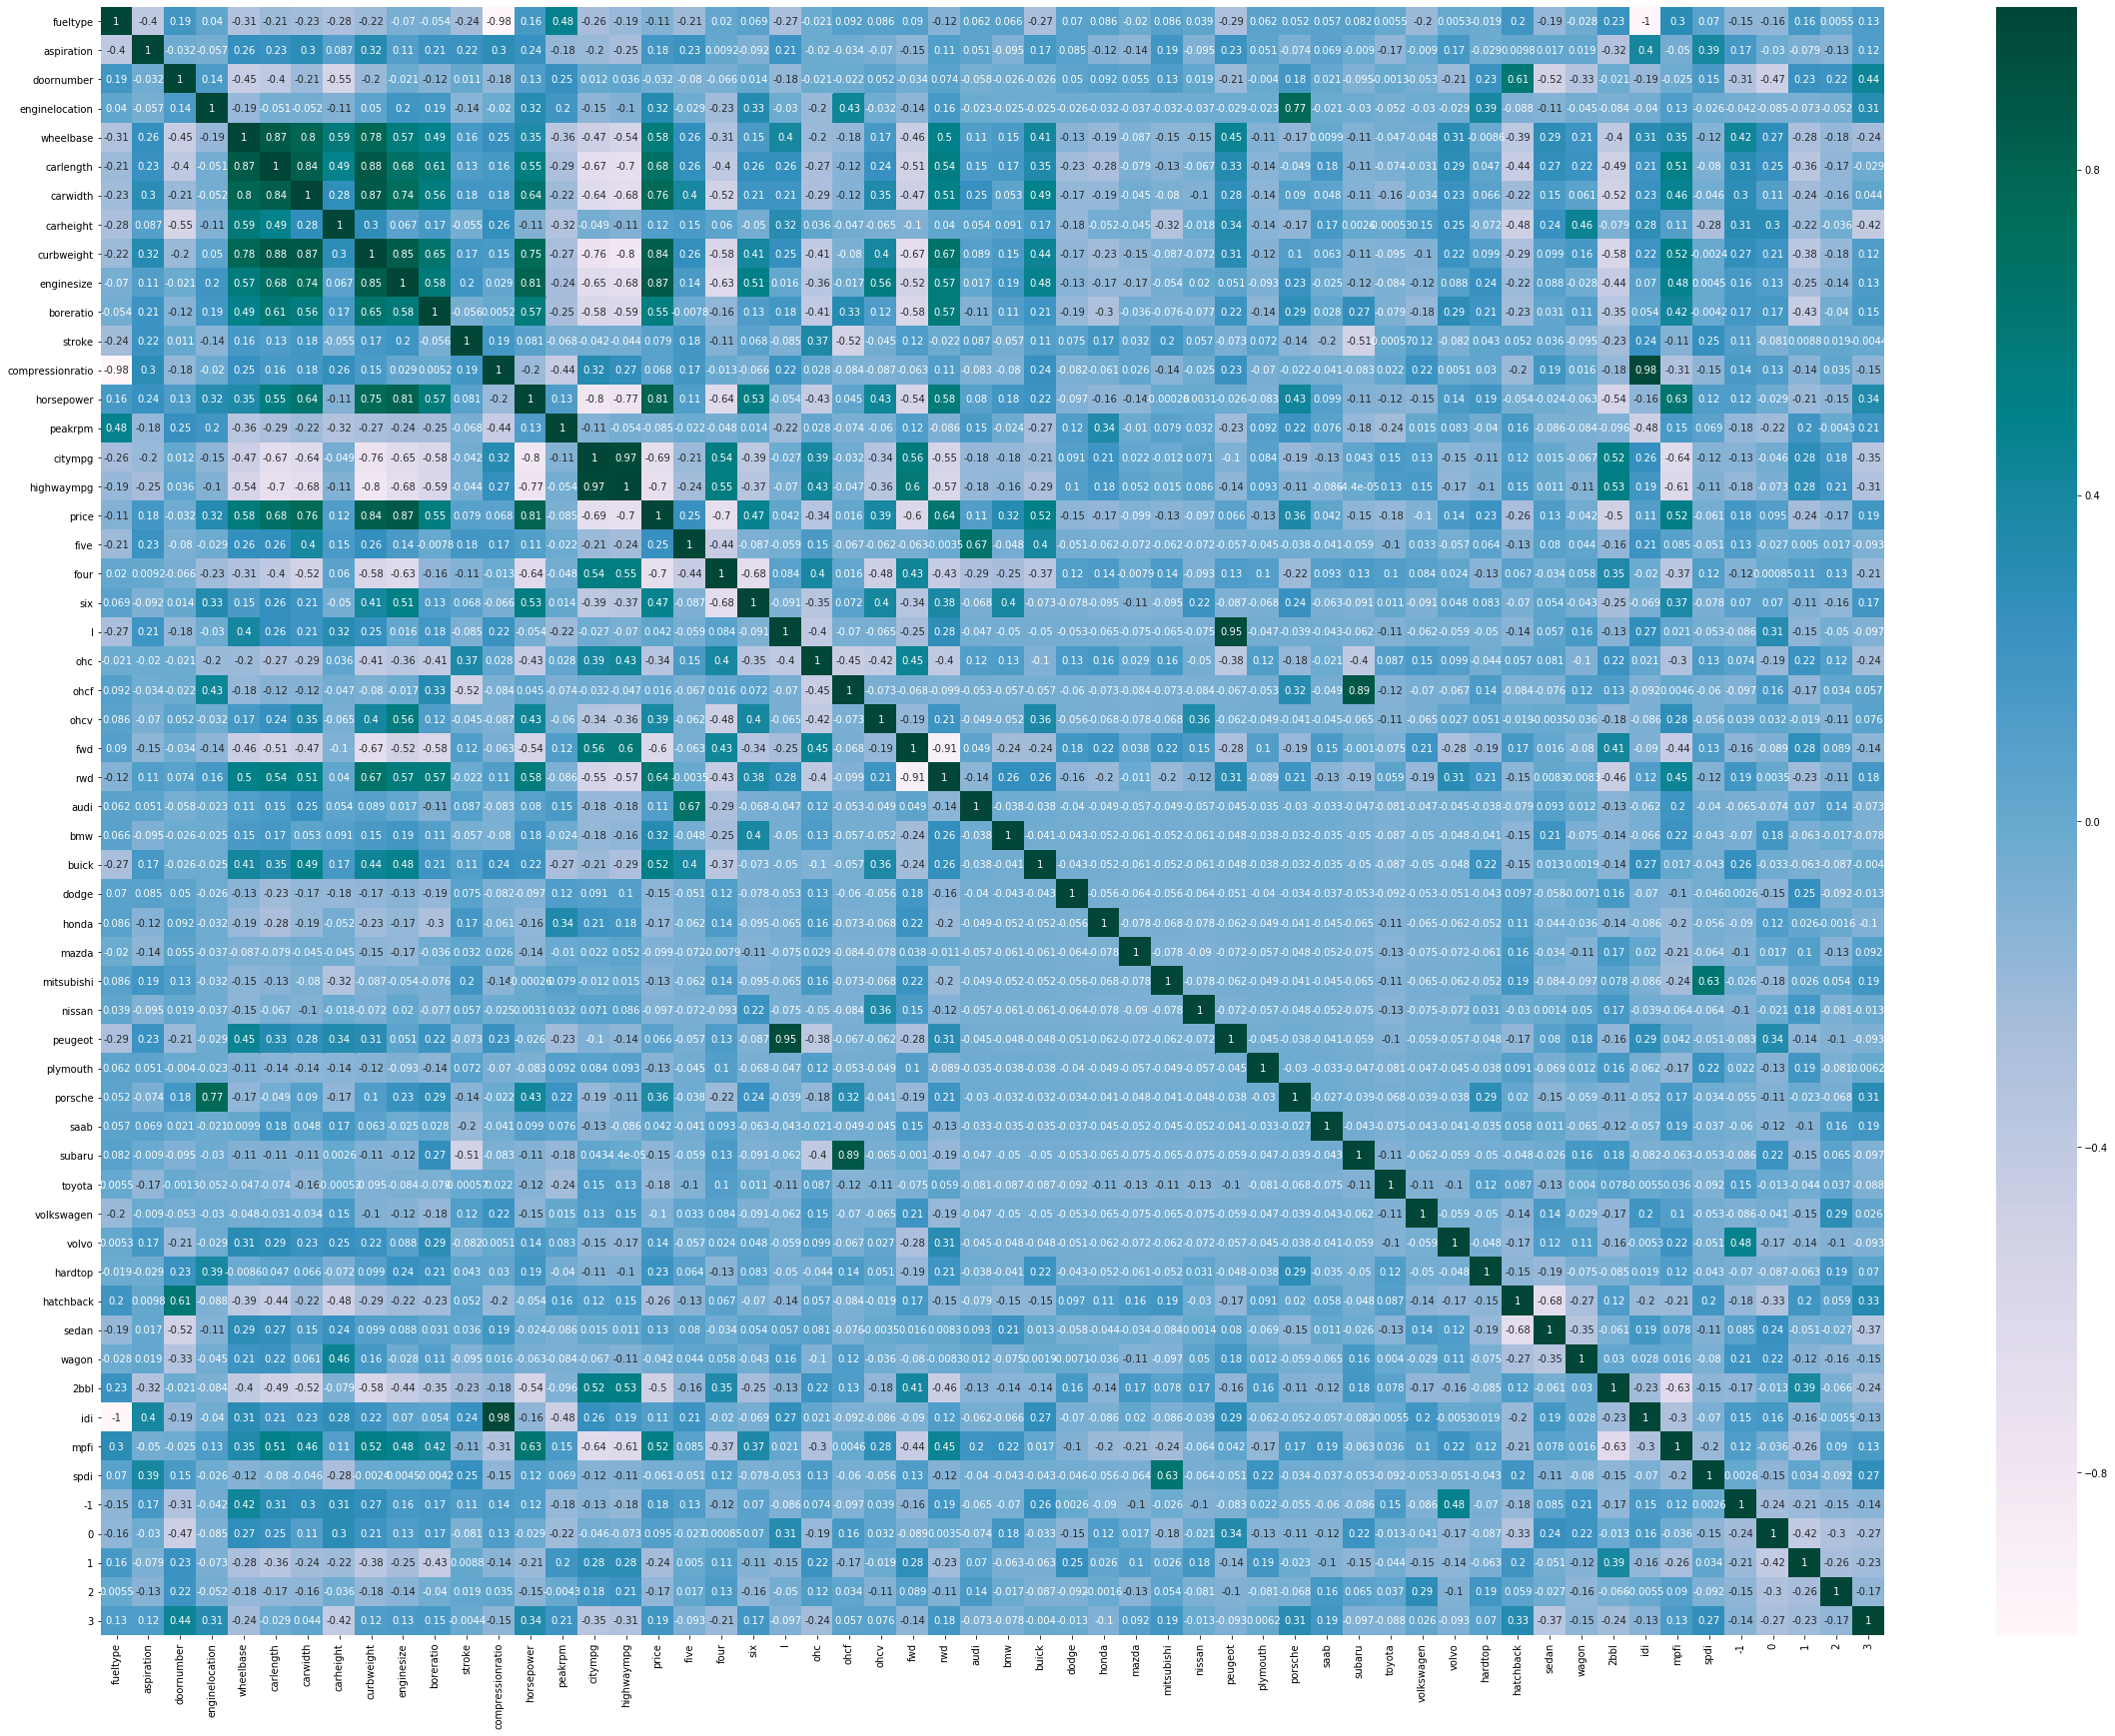

In [23]:
# visualising highly correlated variables
cor = car1.corr()
plt.figure(figsize=(40,30))
sns.heatmap(cor, cmap="PuBuGn", annot=True)
# plotting correlation graph dark blocks shows the values of highly correlated variables
plt.show()

#### enlisting highly correlated variables

In [24]:
a= car1.corr().abs()
a= a.unstack().sort_values(kind="quicksort")
a=a.dropna()
a= a[a != 1.0]
print(a)

highwaympg        subaru              0.000044
subaru            highwaympg          0.000044
horsepower        mitsubishi          0.000265
mitsubishi        horsepower          0.000265
carheight         toyota              0.000530
toyota            carheight           0.000530
stroke            toyota              0.000570
toyota            stroke              0.000570
0                 four                0.000851
four              0                   0.000851
fwd               subaru              0.001029
subaru            fwd                 0.001029
toyota            doornumber          0.001321
doornumber        toyota              0.001321
sedan             nissan              0.001383
nissan            sedan               0.001383
2                 honda               0.001614
honda             2                   0.001614
wagon             buick               0.001878
buick             wagon               0.001878
spdi              curbweight          0.002434
curbweight   

### MULTICOLLINEARITY-> there are high correlations between two or more predictor variables. In other words, one predictor variable can be used to predict the other. This creates redundant information, skewing the results in a regression model.
#### Variables such as compressionratio, fueltype, citympg,highwaympg, curbweight,wheelbase,carlength are some of the highly correlated variables. Other variables such as enginesize , curbweight, horsepower, carwidth , citympg are highly corelated with price .

# Model building and evaluation

## splitting into test-train dataframe

In [25]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(car1, train_size=0.7, test_size=0.3, random_state=100)

In [26]:
# checking train  dataframe column
df_train.columns

Index([        'fueltype',       'aspiration',       'doornumber',
         'enginelocation',        'wheelbase',        'carlength',
               'carwidth',        'carheight',       'curbweight',
             'enginesize',        'boreratio',           'stroke',
       'compressionratio',       'horsepower',          'peakrpm',
                'citympg',       'highwaympg',            'price',
                   'five',             'four',              'six',
                      'l',              'ohc',             'ohcf',
                   'ohcv',              'fwd',              'rwd',
                   'audi',              'bmw',            'buick',
                  'dodge',            'honda',            'mazda',
             'mitsubishi',           'nissan',          'peugeot',
               'plymouth',          'porsche',             'saab',
                 'subaru',           'toyota',       'volkswagen',
                  'volvo',          'hardtop',        'hatchba

In [27]:
# describing train dataframe
df_train.describe()

fueltype  aspiration  doornumber  enginelocation   wheelbase  \
count  143.000000  143.000000  143.000000      143.000000  143.000000   
mean     0.909091    0.181818    0.440559        0.006993   98.523077   
std      0.288490    0.387050    0.498199        0.083624    5.961835   
min      0.000000    0.000000    0.000000        0.000000   86.600000   
25%      1.000000    0.000000    0.000000        0.000000   94.500000   
50%      1.000000    0.000000    0.000000        0.000000   96.500000   
75%      1.000000    0.000000    1.000000        0.000000  101.200000   
max      1.000000    1.000000    1.000000        1.000000  115.600000   

        carlength    carwidth   carheight   curbweight  enginesize  \
count  143.000000  143.000000  143.000000   143.000000  143.000000   
mean   173.416783   65.839860   53.551748  2539.510490  124.958042   
std     12.598122    2.214203    2.433766   544.650539   40.974034   
min    141.100000   60.300000   47.800000  1488.000000   61.000000   
25%    165.650000   63.950000   51.800000  2121.000000   97.000000   
50%    172.000000   65.400000   53.700000  2405.000000  110.000000   
75%    182.300000   66.900000   55.350000  2930.500000  141.000000   
max    202.600000   72.300000   59.100000  4066.000000  326.000000   

        boreratio      stroke  compressionratio  horsepower      peakrpm  \
count  143.000000  143.000000        143.000000  143.000000   143.000000   
mean     3.307413    3.250070         10.052587  102.552448  5130.069930   
std      0.260997    0.312529          3.794890   39.722750   481.273979   
min      2.680000    2.190000          7.000000   48.000000  4150.000000   
25%      3.065000    3.110000          8.600000   70.000000  4800.000000   
50%      3.310000    3.270000          9.000000   94.000000  5200.000000   
75%      3.540000    3.400000          9.400000  116.000000  5500.000000   
max      3.940000    4.170000         23.000000  288.000000  6600.000000   

          citympg  highwaympg         price        five        four  \
count  143.000000  143.000000    143.000000  143.000000  143.000000   
mean    25.391608   30.874126  13056.347322    0.062937    0.741259   
std      6.701939    6.973660   7807.036883    0.243703    0.439483   
min     13.000000   17.000000   5118.000000    0.000000    0.000000   
25%     19.000000   25.000000   7554.000000    0.000000    0.000000   
50%     25.000000   31.000000  10198.000000    0.000000    1.000000   
75%     31.000000   36.500000  16465.000000    0.000000    1.000000   
max     49.000000   54.000000  41315.000000    1.000000    1.000000   

              six           l         ohc        ohcf        ohcv         fwd  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.132867    0.062937    0.685315    0.083916    0.062937    0.594406   
std      0.340624    0.243703    0.466023    0.278236    0.243703    0.492733   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    1.000000   
75%      0.000000    0.000000    1.000000    0.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              rwd        audi         bmw       buick       dodge       honda  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.349650    0.034965    0.041958    0.034965    0.041958    0.062937   
std      0.478536    0.184337    0.201198    0.184337    0.201198    0.243703   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000

## Scaling the variables

In [28]:
# importing minmaxscalar 
from sklearn.preprocessing import MinMaxScaler
# here we ar using minmaxscalar
scaler = MinMaxScaler()
var = [ 'wheelbase',        'carlength',
        'carwidth',        'carheight',         'curbweight',
        'enginesize',        'boreratio',        'stroke',
        'compressionratio', 'horsepower',       'peakrpm',
        'citympg',       'highwaympg',           'price']
# performing minmaxscaling
df_train[var] = scaler.fit_transform(df_train[var])

In [29]:
# checking value after scaling operation
df_train.describe()

fueltype  aspiration  doornumber  enginelocation   wheelbase  \
count  143.000000  143.000000  143.000000      143.000000  143.000000   
mean     0.909091    0.181818    0.440559        0.006993    0.411141   
std      0.288490    0.387050    0.498199        0.083624    0.205581   
min      0.000000    0.000000    0.000000        0.000000    0.000000   
25%      1.000000    0.000000    0.000000        0.000000    0.272414   
50%      1.000000    0.000000    0.000000        0.000000    0.341379   
75%      1.000000    0.000000    1.000000        0.000000    0.503448   
max      1.000000    1.000000    1.000000        1.000000    1.000000   

        carlength    carwidth   carheight  curbweight  enginesize   boreratio  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.525476    0.461655    0.509004    0.407878    0.241351    0.497946   
std      0.204848    0.184517    0.215378    0.211269    0.154619    0.207140   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.399187    0.304167    0.353982    0.245539    0.135849    0.305556   
50%      0.502439    0.425000    0.522124    0.355702    0.184906    0.500000   
75%      0.669919    0.550000    0.668142    0.559542    0.301887    0.682540   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           stroke  compressionratio  horsepower     peakrpm     citympg  \
count  143.000000        143.000000  143.000000  143.000000  143.000000   
mean     0.535389          0.190787    0.227302    0.400029    0.344211   
std      0.157843          0.237181    0.165511    0.196438    0.186165   
min      0.000000          0.000000    0.000000    0.000000    0.000000   
25%      0.464646          0.100000    0.091667    0.265306    0.166667   
50%      0.545455          0.125000    0.191667    0.428571    0.333333   
75%      0.611111          0.150000    0.283333    0.551020    0.500000   
max      1.000000          1.000000    1.000000    1.000000    1.000000   

       highwaympg       price        five        four         six           l  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.374976    0.219310    0.062937    0.741259    0.132867    0.062937   
std      0.188477    0.215682    0.243703    0.439483    0.340624    0.243703   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.216216    0.067298    0.000000    0.000000    0.000000    0.000000   
50%      0.378378    0.140343    0.000000    1.000000    0.000000    0.000000   
75%      0.527027    0.313479    0.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              ohc        ohcf        ohcv         fwd         rwd        audi  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.685315    0.083916    0.062937    0.594406    0.349650    0.034965   
std      0.466023    0.278236    0.243703    0.492733    0.478536    0.184337   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    1.000000    0.000000    0.000000   
75%      1.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              bmw       buick       dodge       honda       mazda  mitsubishi  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.041958    0.034965    0.041958    0.062937    0.090909    0.062937   
std      0.201198    0.184337    0.201198    0.243703    0.288490    0.243703   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   

## checking highly correlated variables

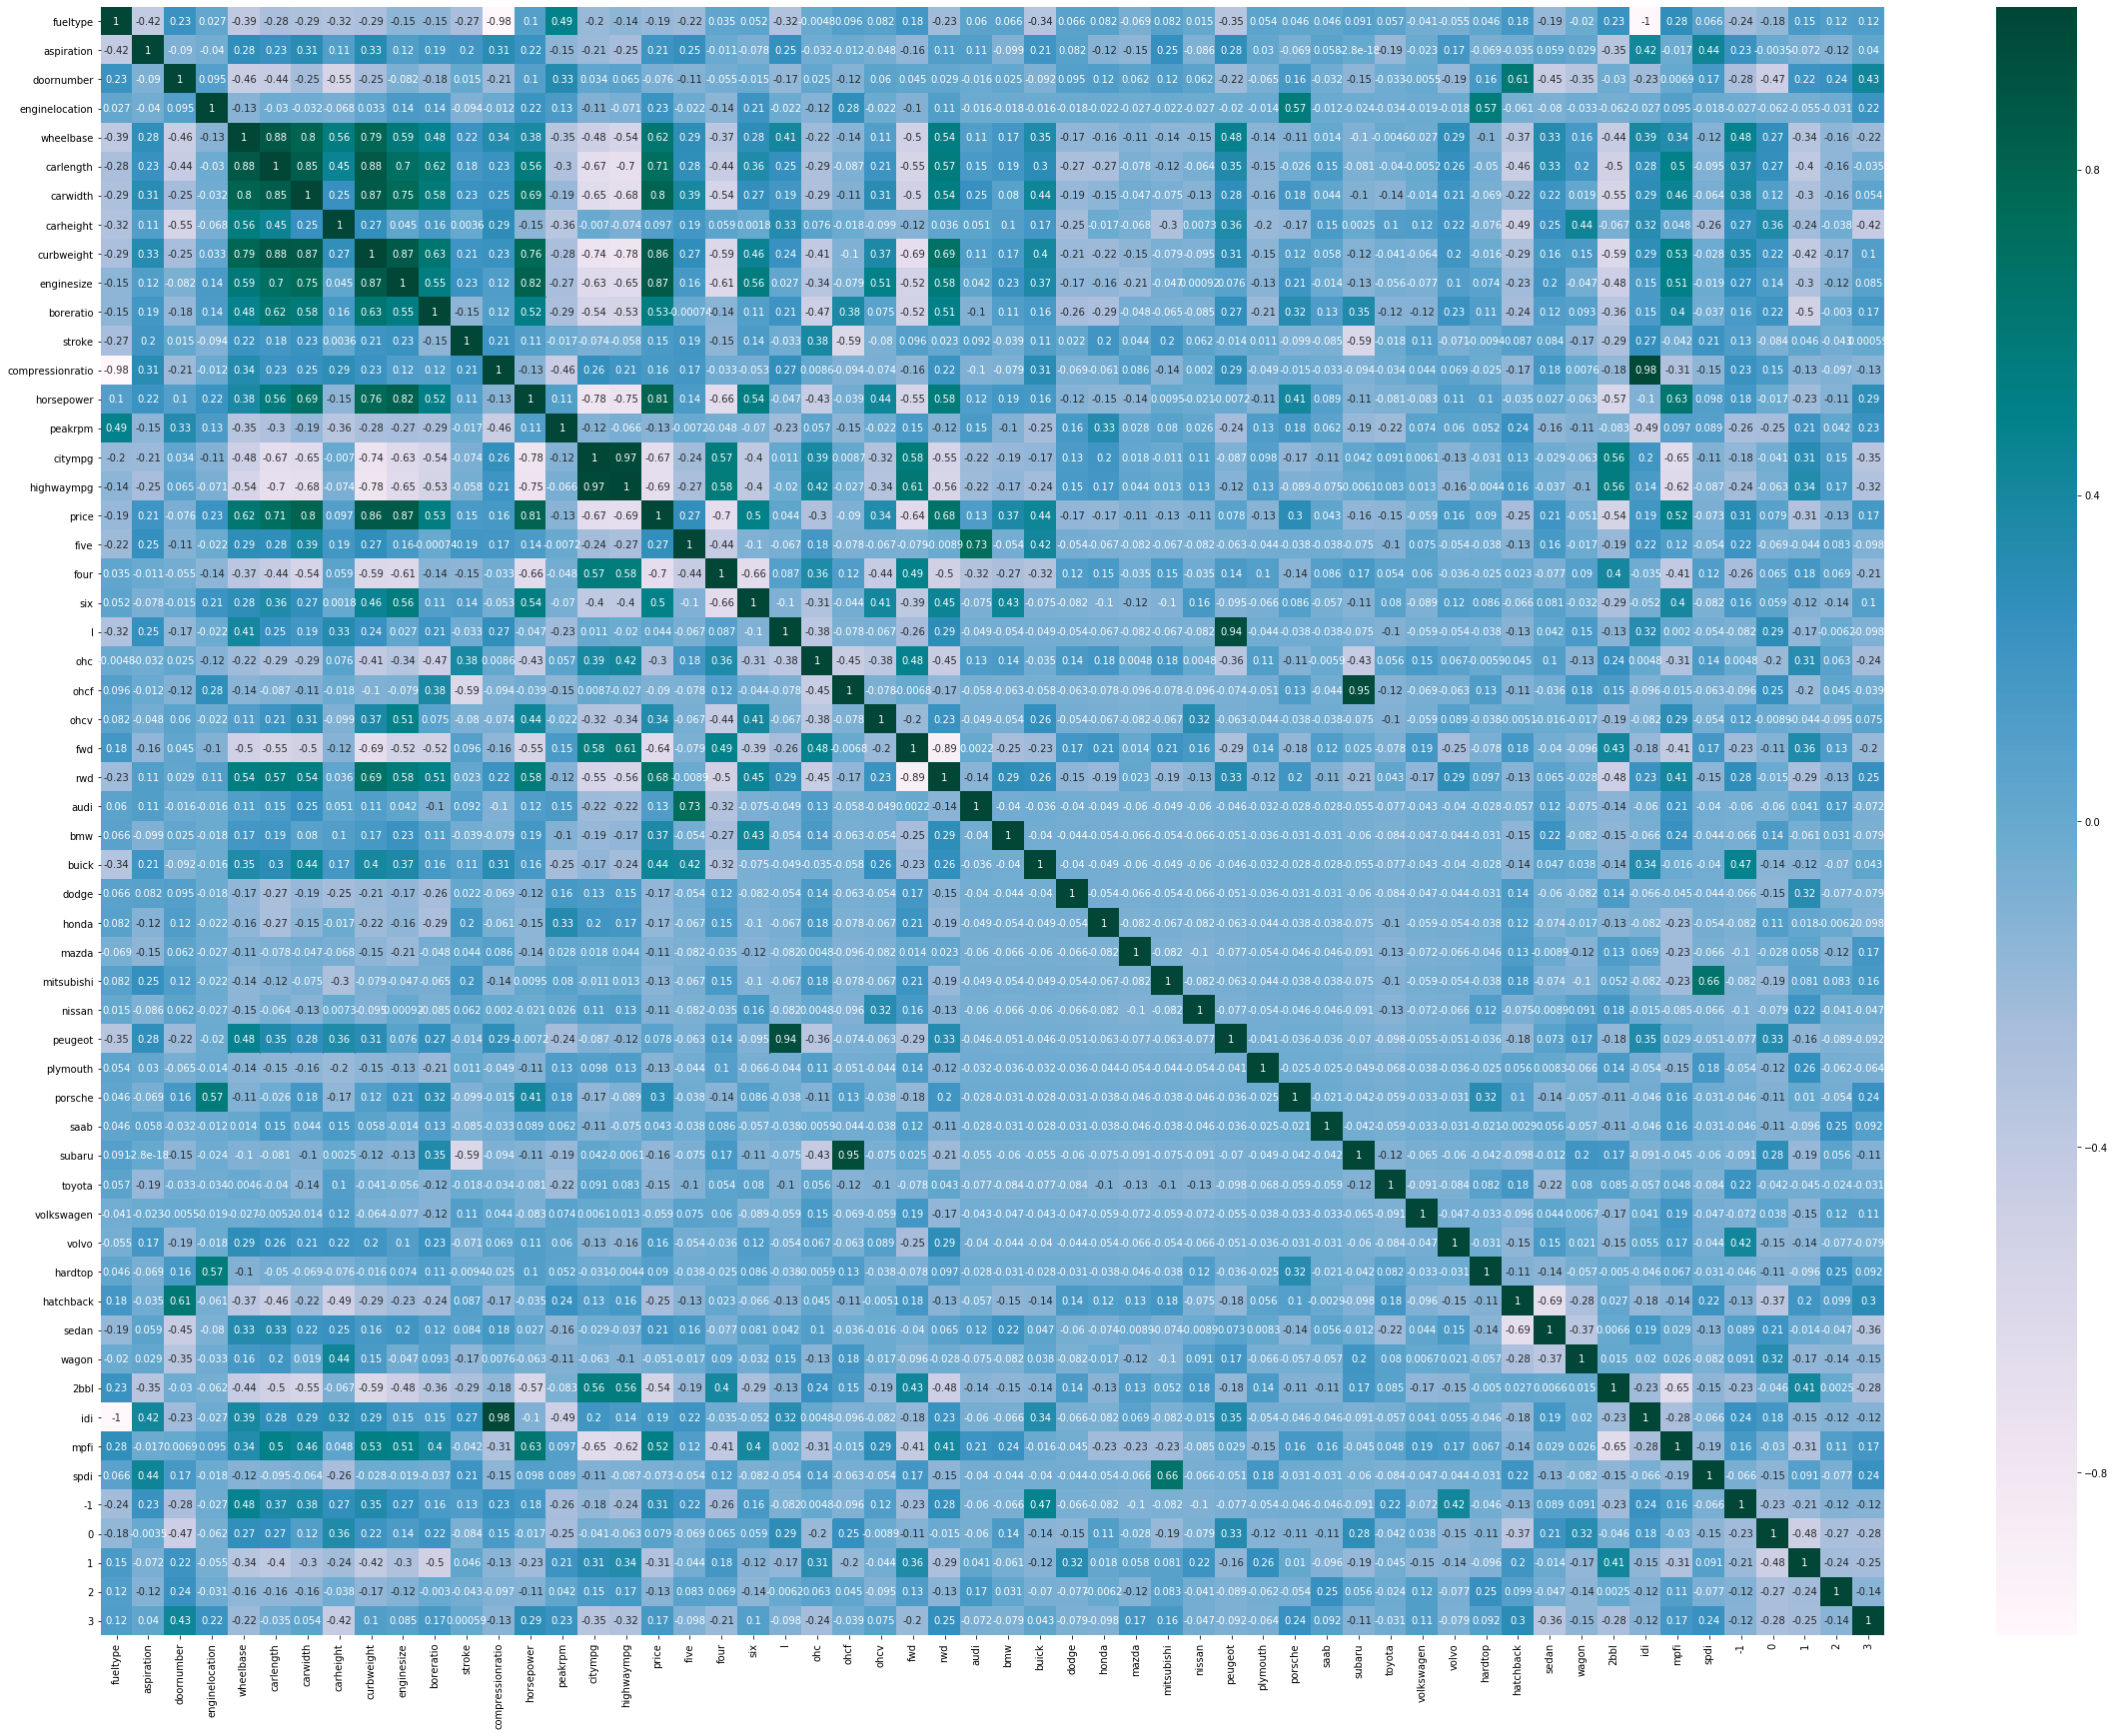

In [30]:
# checking highly correlated variables
cor = df_train.corr()
plt.figure(figsize=(40,30))
sns.heatmap(cor, cmap="PuBuGn", annot=True)
# plotting correlation graph dark blocks shows the values of highly correlated variables
plt.show()

In [31]:
# checking and removing highly correlated variables

# dropping enginesize because it is highly correlated
df_train.drop('enginesize', axis = 1, inplace = True)
# dropping 1 because it is highly correlated
df_train.drop('l', axis = 1, inplace = True)
# dropping wheelbase because it is highly correlated
df_train.drop('wheelbase', axis = 1, inplace = True)
# dropping idi because it is highly correlated
df_train.drop('idi', axis = 1, inplace = True)
# dropping peugeot because it is highly correlated
df_train.drop('peugeot', axis = 1, inplace = True)
# dropping carlength because it is highly correlated
df_train.drop('carlength', axis = 1, inplace = True)
# dropping carwidth because it is highly correlated
df_train.drop('carwidth', axis = 1, inplace = True)
# dropping curbweight because it is highly correlated
df_train.drop('curbweight', axis = 1, inplace = True)
# dropping hardtop because it is highly correlated
df_train.drop('hardtop', axis = 1, inplace = True)
# dropping subaru because it is highly correlated
df_train.drop('subaru', axis = 1, inplace = True)
# dropping porsche because it is highly correlated
df_train.drop('porsche', axis = 1, inplace = True)

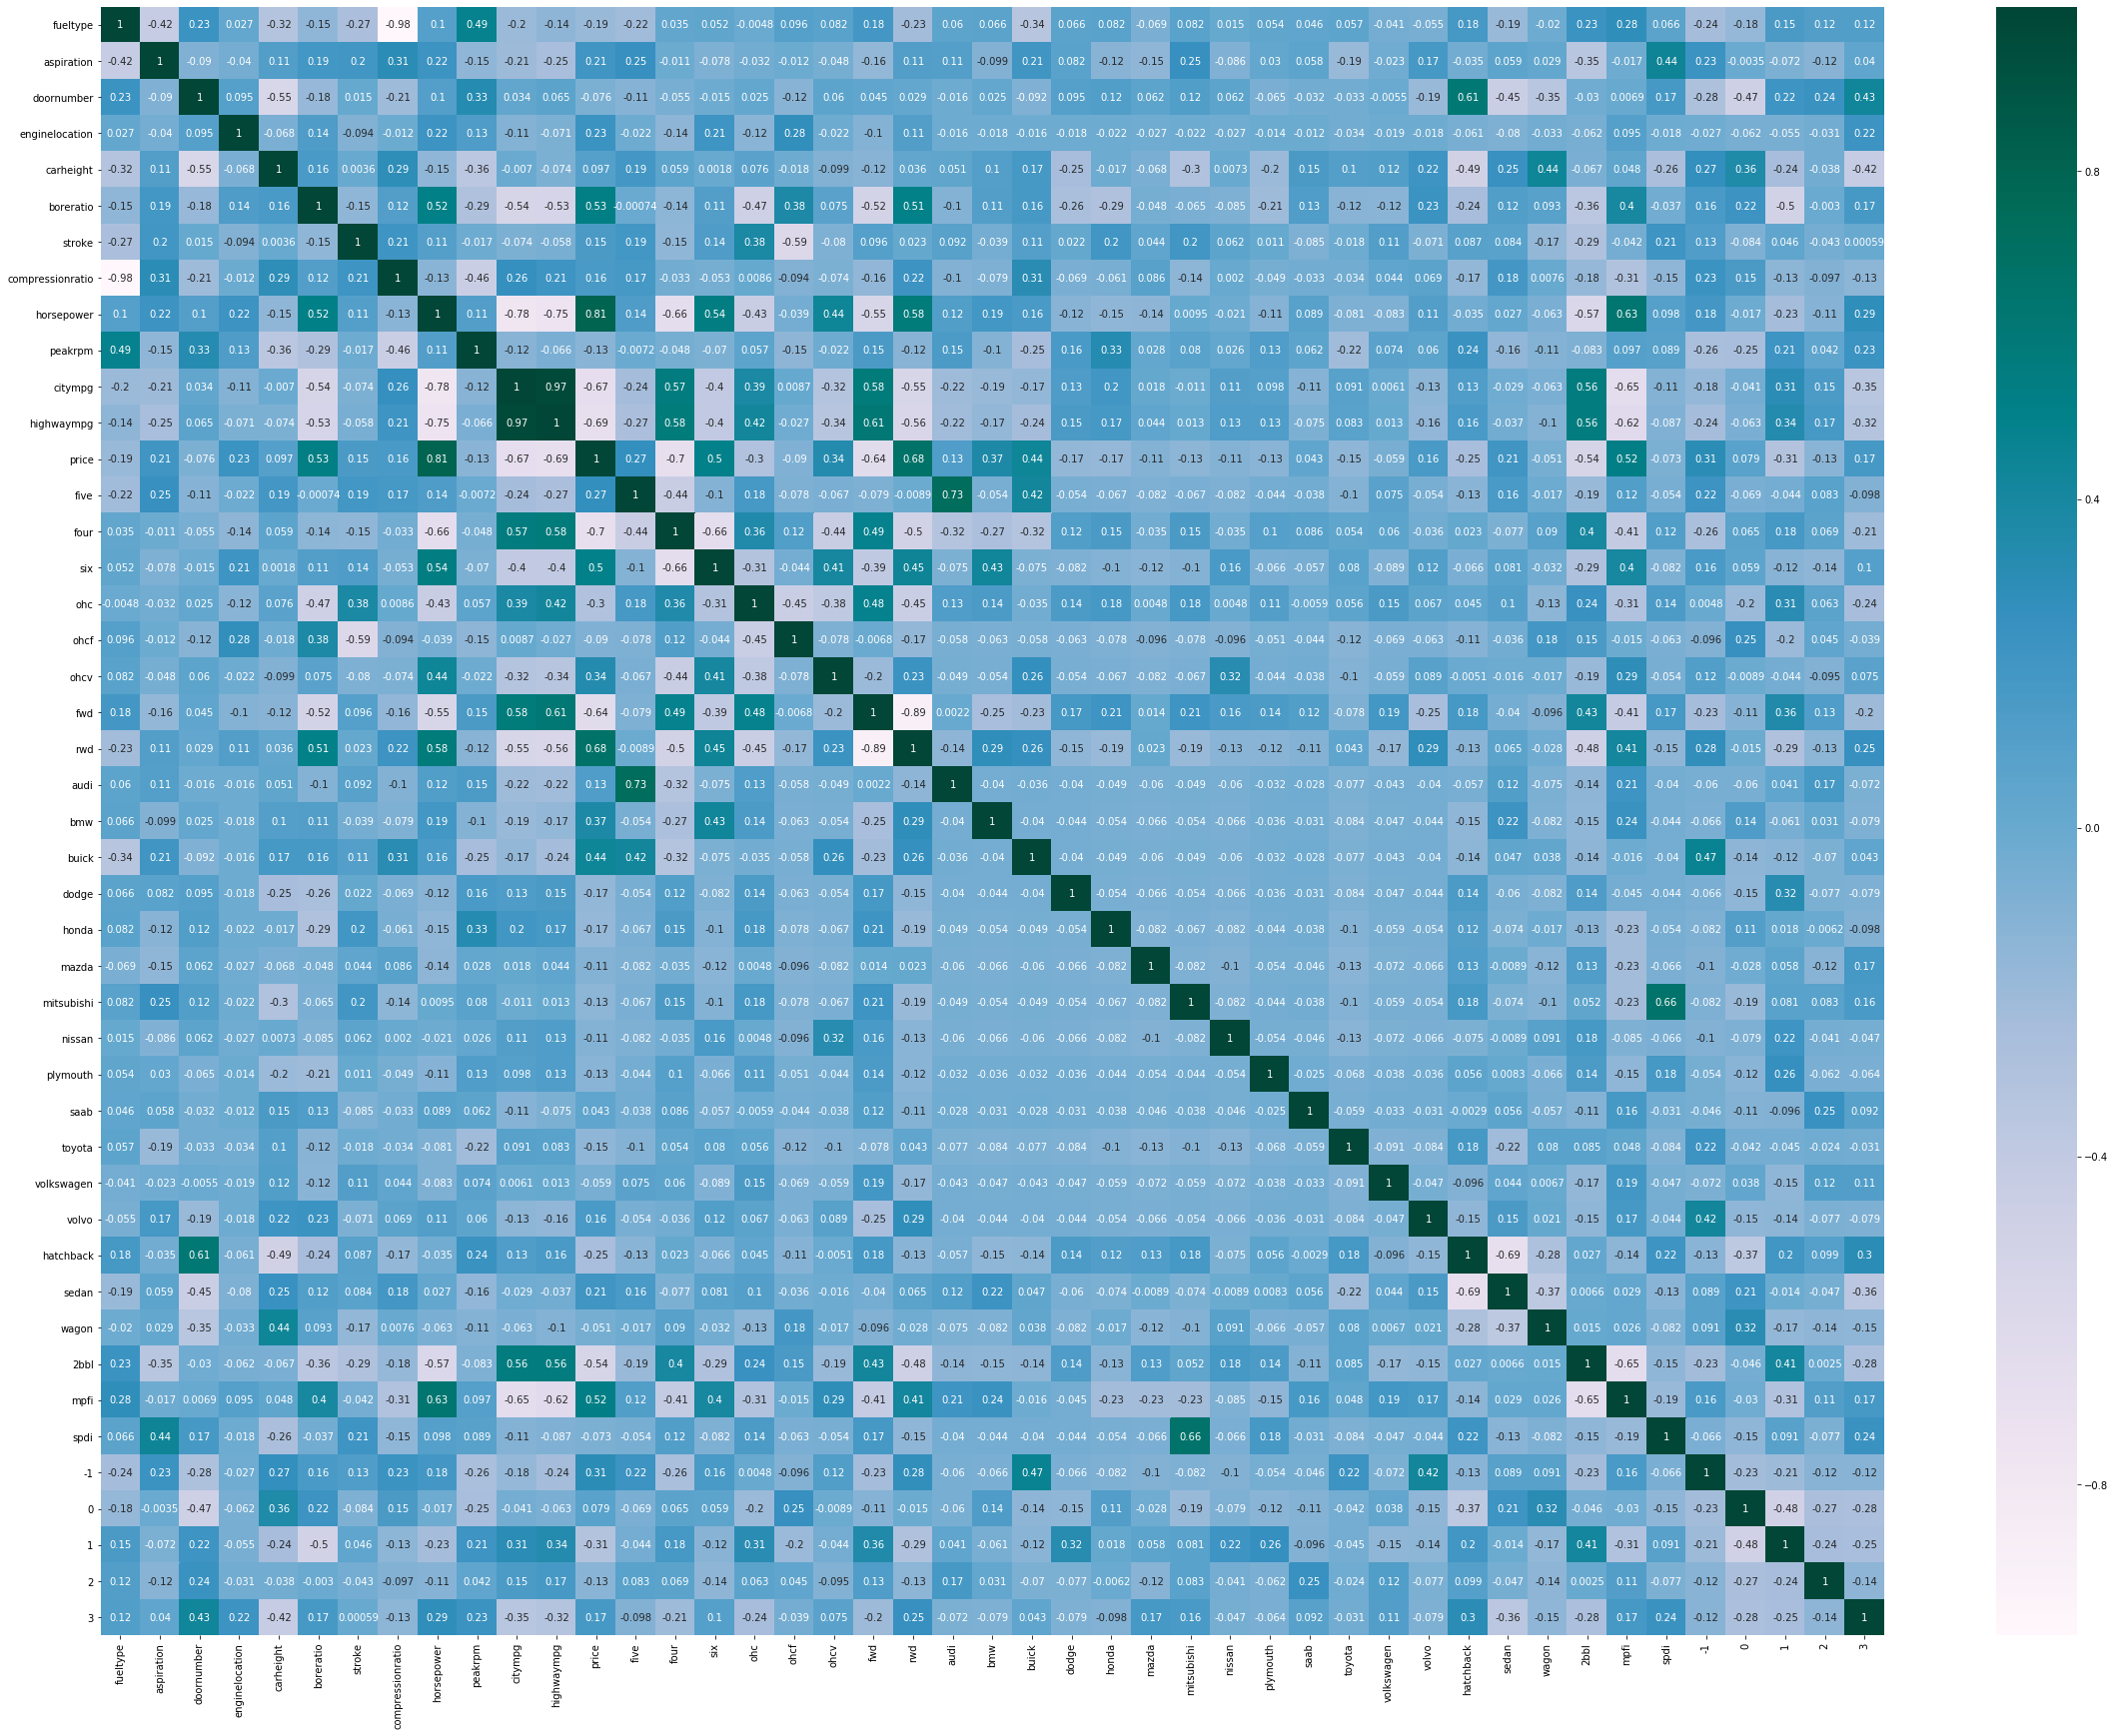

In [32]:
# checking correlation again after removing variables
plt.figure(figsize = (40, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="PuBuGn")
# plotting correlation graph dark blocks shows the values of highly correlated variables
plt.show()

## RFE for selecting top features from training dataset

In [33]:
# importing RFE 
from sklearn.feature_selection import RFE
# importing LinearRegression
from sklearn.linear_model import LinearRegression

In [34]:
y_train = df_train.pop('price')
X_train = df_train

In [35]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [36]:
# cheking RFE ranking for variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', True, 1),
 ('aspiration', False, 7),
 ('doornumber', False, 23),
 ('enginelocation', True, 1),
 ('carheight', False, 18),
 ('boreratio', False, 11),
 ('stroke', False, 31),
 ('compressionratio', False, 22),
 ('horsepower', True, 1),
 ('peakrpm', False, 9),
 ('citympg', False, 6),
 ('highwaympg', True, 1),
 ('five', True, 1),
 ('four', False, 14),
 ('six', False, 35),
 ('ohc', False, 21),
 ('ohcf', False, 10),
 ('ohcv', False, 8),
 ('fwd', False, 32),
 ('rwd', False, 29),
 ('audi', True, 1),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('dodge', False, 19),
 ('honda', False, 17),
 ('mazda', False, 16),
 ('mitsubishi', False, 13),
 ('nissan', False, 15),
 ('plymouth', False, 20),
 ('saab', False, 27),
 ('toyota', False, 12),
 ('volkswagen', False, 28),
 ('volvo', True, 1),
 ('hatchback', False, 25),
 ('sedan', False, 26),
 ('wagon', False, 24),
 ('2bbl', False, 34),
 ('mpfi', False, 33),
 ('spdi', False, 30),
 (-1, False, 5),
 (0, True, 1),
 (1, False, 3),
 (2, False, 2),
 (3, 

In [37]:
col = X_train.columns[rfe.support_]

In [38]:
# checking column names for X_train "rfe.support_"
col

Index([      'fueltype', 'enginelocation',     'horsepower',     'highwaympg',
                 'five',           'audi',            'bmw',          'buick',
                'volvo',                0],
      dtype='object')

In [39]:
# checking column names for X_train "~rfe.support_"
X_train.columns[~rfe.support_]

Index([      'aspiration',       'doornumber',        'carheight',
              'boreratio',           'stroke', 'compressionratio',
                'peakrpm',          'citympg',             'four',
                    'six',              'ohc',             'ohcf',
                   'ohcv',              'fwd',              'rwd',
                  'dodge',            'honda',            'mazda',
             'mitsubishi',           'nissan',         'plymouth',
                   'saab',           'toyota',       'volkswagen',
              'hatchback',            'sedan',            'wagon',
                   '2bbl',             'mpfi',             'spdi',
                       -1,                  1,                  2,
                        3],
      dtype='object')

## Creating model on training data set

In [40]:
X_train_rfe_1 = X_train[col]

In [41]:
# Importing stats model
import statsmodels.api as sm  
X_train_rfe_1 = sm.add_constant(X_train_rfe_1)

In [42]:
lm = sm.OLS(y_train,X_train_rfe_1).fit()   

In [43]:
# printing summary and observing p-value and R-squared values 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     95.79
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.71e-55
Time:                        10:15:20   Log-Likelihood:                 167.89
No. Observations:                 143   AIC:                            -313.8
Df Residuals:                     132   BIC:                            -281.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1599      0.049      3.

In [44]:
# importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe_1.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# checking VIF for various variables
vif

Features   VIF
0        fueltype  8.16
3      highwaympg  4.32
4            five  4.23
2      horsepower  4.13
5            audi  3.51
7           buick  1.96
9               0  1.56
6             bmw  1.12
8           volvo  1.10
1  enginelocation  1.08

#### dropping " highwaympg " variable due to high p-value

In [45]:
X_train_rfe_2 = X_train_rfe_1.drop("highwaympg", axis = 1)

In [46]:
# Importing stats model
import statsmodels.api as sm  
X_train_rfe_2 = sm.add_constant(X_train_rfe_2)

In [47]:
lm = sm.OLS(y_train,X_train_rfe_2).fit()   

In [48]:
# printing summary and observing p-value and R-squared values 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           8.56e-56
Time:                        10:15:20   Log-Likelihood:                 166.07
No. Observations:                 143   AIC:                            -312.1
Df Residuals:                     133   BIC:                            -282.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0836      0.027      3.

In [49]:
# importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe_2.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# checking VIF for various variables
vif

Features   VIF
3            five  4.16
2      horsepower  3.45
4            audi  3.39
0        fueltype  3.01
6           buick  1.96
8               0  1.48
5             bmw  1.12
7           volvo  1.10
1  enginelocation  1.08

#### dropping " five " variable due to high p-value

In [50]:
X_train_rfe_3 = X_train_rfe_2.drop("five", axis = 1)

In [51]:
# Importing stats model
import statsmodels.api as sm  
X_train_rfe_3 = sm.add_constant(X_train_rfe_3)

In [52]:
lm = sm.OLS(y_train,X_train_rfe_3).fit()

In [53]:
# printing summary and observing p-value and R-squared values 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     114.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.96e-56
Time:                        10:15:21   Log-Likelihood:                 164.30
No. Observations:                 143   AIC:                            -310.6
Df Residuals:                     134   BIC:                            -283.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0731      0.027      2.

In [54]:
# importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe_3.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# checking VIF for various variables
vif

Features   VIF
2      horsepower  3.44
0        fueltype  2.99
7               0  1.46
5           buick  1.14
4             bmw  1.12
6           volvo  1.10
1  enginelocation  1.08
3            audi  1.07

#### the values of VIF for all the features used in the model are now small

## Training set residual analysis

In [55]:
y_train_price = lm.predict(X_train_rfe_3)

Text(0.5, 0, 'Errors')

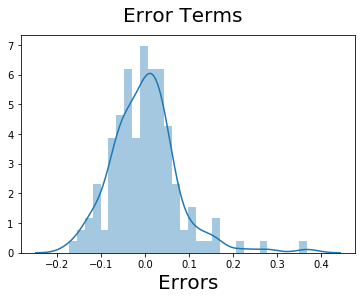

In [56]:
# Plotting histogram for error analysis
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 20)              

#### here the error seems to be normally distributed

In [57]:
# here we are performing scaling operation
var = ['wheelbase',       'carlength',
       'carwidth',        'carheight',       'curbweight',
       'enginesize',       'boreratio',      'stroke',
       'compressionratio', 'horsepower',      'peakrpm',
       'citympg',          'highwaympg',      'price']
df_test[var] = scaler.transform(df_test[var])

## Dividing data into X_test and y_test

In [58]:
y_test = df_test.pop('price')
X_test = df_test

In [59]:
# creating X_test _new df 
X_test_new = X_test[X.columns]
X_test_new = sm.add_constant(X_test_new)

## Making prediction

In [60]:
y_pred = lm.predict(X_test_new)

## Doing model evaluation

Text(0, 0.5, 'y_pred')

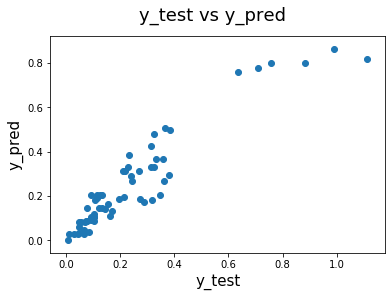

In [61]:
# plotting y_pred vs y_test
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=18)             
plt.xlabel('y_test', fontsize=15)                         
plt.ylabel('y_pred', fontsize=15)      

#### from the above figure it seems that model is working properly on test data set

## R-square value for test set

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8806562215781801


#### the R-square value is 88.0656% for test data

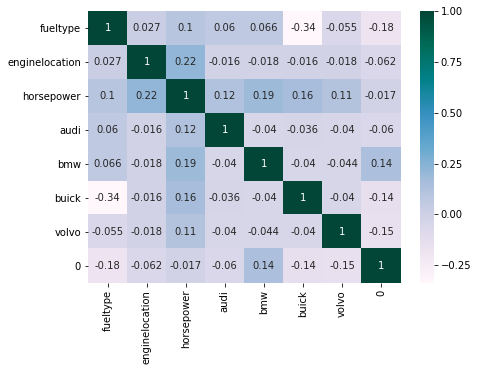

In [65]:
plt.figure(figsize=(7,5))
sns.heatmap(X.corr(), cmap="PuBuGn", annot=True)
plt.show()

#### the above heatmap show relatievly low correlation among variables

In [64]:
# Checking description of variables
df_test.describe()

fueltype  aspiration  doornumber  enginelocation  wheelbase  \
count  62.000000   62.000000   62.000000       62.000000  62.000000   
mean    0.887097    0.177419    0.435484        0.032258   0.437764   
std     0.319058    0.385142    0.499868        0.178127   0.212861   
min     0.000000    0.000000    0.000000        0.000000   0.000000   
25%     1.000000    0.000000    0.000000        0.000000   0.313793   
50%     1.000000    0.000000    0.000000        0.000000   0.387931   
75%     1.000000    0.000000    1.000000        0.000000   0.570690   
max     1.000000    1.000000    1.000000        1.000000   1.182759   

       carlength   carwidth  carheight  curbweight  enginesize  boreratio  \
count  62.000000  62.000000  62.000000   62.000000   62.000000  62.000000   
mean    0.559481   0.480376   0.559663    0.428470    0.265673   0.556580   
std     0.189947   0.165440   0.215811    0.179488    0.162820   0.228484   
min     0.056911   0.183333   0.141593    0.128394    0.067925  -0.111111   
25%     0.459350   0.358333   0.384956    0.305275    0.177358   0.404762   
50%     0.547967   0.441667   0.588496    0.406129    0.226415   0.563492   
75%     0.719919   0.516667   0.699115    0.564876    0.316038   0.746032   
max     1.089431   0.975000   1.061947    0.935609    0.932075   0.888889   

          stroke  compressionratio  horsepower    peakrpm    citympg  \
count  62.000000         62.000000   62.000000  62.000000  62.000000   
mean    0.544314          0.209375    0.248858   0.393351   0.328405   
std     0.160738          0.273690    0.163376   0.192092   0.172009   
min    -0.060606          0.000000    0.016667   0.000000   0.027778   
25%     0.484848          0.093750    0.107292   0.265306   0.166667   
50%     0.585859          0.125000    0.218750   0.346939   0.305556   
75%     0.641414          0.150000    0.295833   0.540816   0.444444   
max     0.863636          1.000000    0.662500   1.000000   0.694444   

       highwaympg       five       four        six          l        ohc  \
count   62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean     0.363993   0.032258   0.854839   0.080645   0.048387   0.806452   
std      0.181845   0.178127   0.355139   0.274512   0.216335   0.398304   
min     -0.027027   0.000000   0.000000   0.000000   0.000000   0.000000   
25%      0.216216   0.000000   1.000000   0.000000   0.000000   1.000000   
50%      0.351351   0.000000   1.000000   0.000000   0.000000   1.000000   
75%      0.459459   0.000000   1.000000   0.000000   0.000000   1.000000   
max      0.810811   1.000000   1.000000   1.000000   1.000000   1.000000   

            ohcf       ohcv        fwd        rwd       audi        bmw  \
count  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean    0.048387   0.064516   0.564516   0.419355   0.032258   0.032258   
std     0.216335   0.247676   0.499868   0.497482   0.178127   0.178127   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   1.000000   0.000000   0.000000   0.000000   
75%     0.000000   0.000000   1.000000   1.000000   0.000000   0.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

           buick      dodge      honda      mazda  mitsubishi     nissan  \
count  62.000000  62.000000  62.000000  62.000000   62.000000  62.000000   
mean    0.048387   0.048387   0.064516   0.064516    0.064516   0.064516   
std     0.216335   0.216335   0.247676   0.247676    0.247676   0.247676   
min     0.000000   0.000000   0.000000   0.000000    0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000    0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000    0.000000   0.000000   
75%     0.000000   0.000000   0.000000   0.000000    0.000000   0.000000   
max     1.000000   1.000000   1.000000   1.000000    1.0

# The final model consist of eight variables.

# The model is having R-square of 87% & adjusted R-square of nearly 87%  on train data set and R-square of 88% for test set.